In [19]:
import cv2
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def display(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

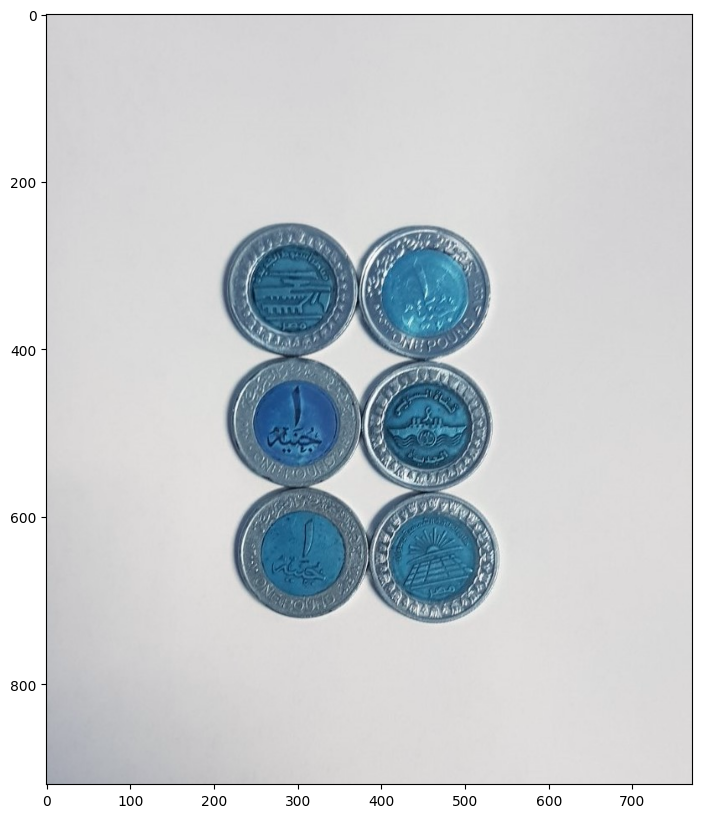

In [31]:
sep_coins=cv2.imread("D:\Epyptian_Coins.jpg")
display(sep_coins)

In [32]:
sep_blur= cv2.medianBlur(sep_coins,7)

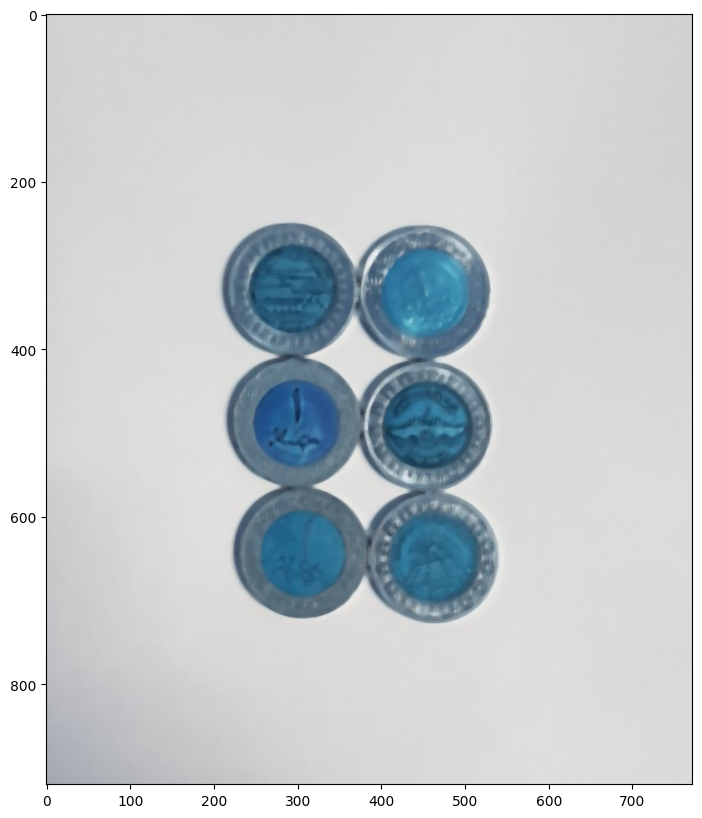

In [33]:
display(sep_blur)

In [34]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

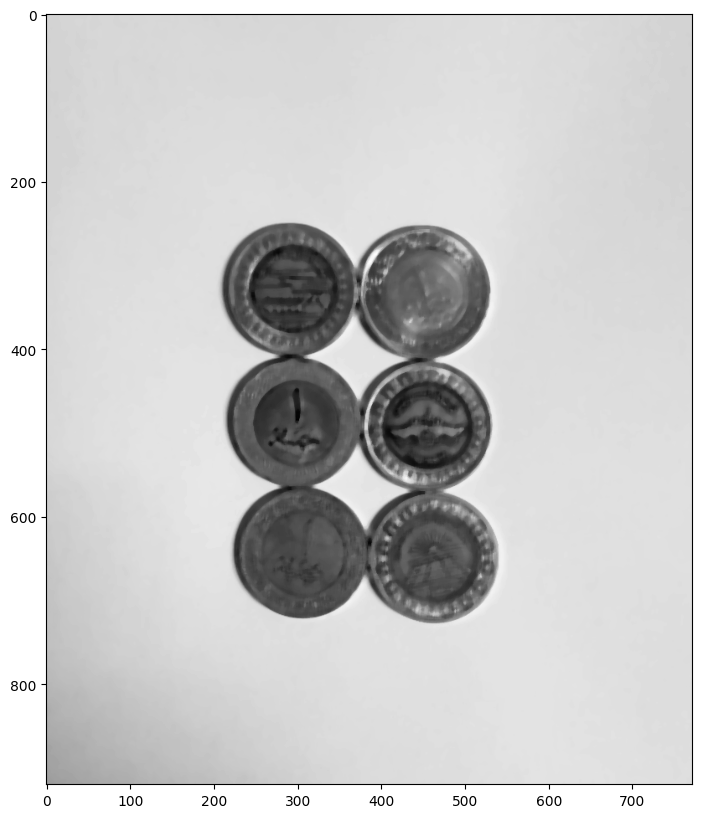

In [35]:
display(gray_sep_coins)

In [36]:
ret , sep_threshold = cv2.threshold(gray_sep_coins,180,255,cv2.THRESH_BINARY_INV)

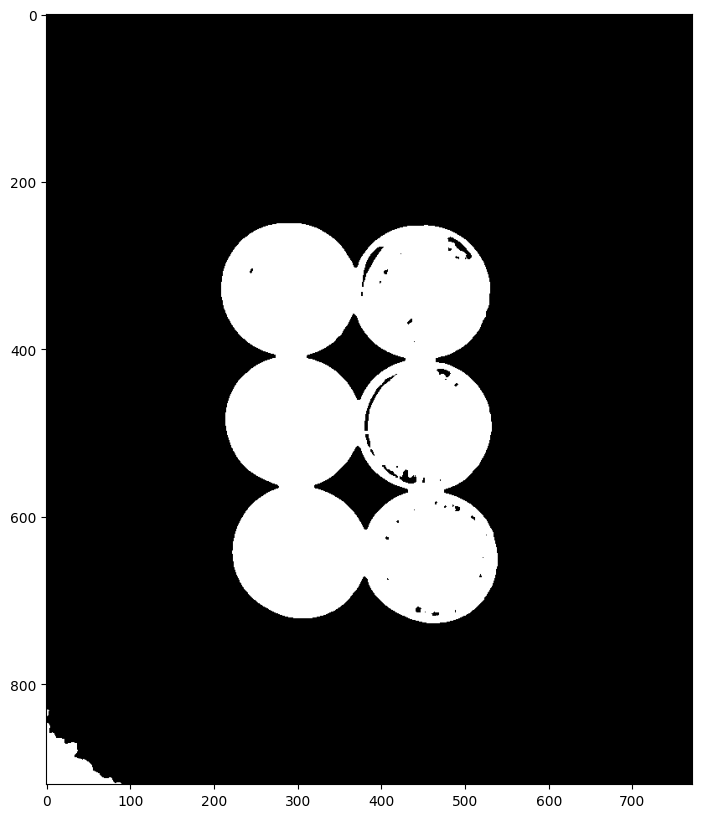

In [38]:
display(sep_threshold)

In [ ]:
####################################################################################################################

In [1]:
#To Remove Noise from this photo 

In [37]:
#kernel = np.ones((3,3),np.uint8)

In [41]:
#closing_sep_threshold= cv2.morphologyEx(sep_threshold, cv2.MORPH_CLOSE,kernel,iterations=3)

In [ ]:
###################################################################################################################

In [10]:
contours , hierarchy = cv2.findContours(sep_threshold.copy(), cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [11]:
for i in range (len(contours)):
    
    if hierarchy[0][i][3]== -1:    # checking the last column in hierarchy --> == -1 for External Contour
       
        cv2.drawContours(sep_coins, contours,i,(255,0,0),10)

.   @param image Destination image.

.   @param contours All the input contours. Each contour is stored as a point vector.

.   @param contourIdx Parameter indicating a contour to draw. If it is negative, all the contours are drawn.

.   @param color Color of the contours.

.   @param thickness Thickness of lines the contours are drawn with. If it is negative

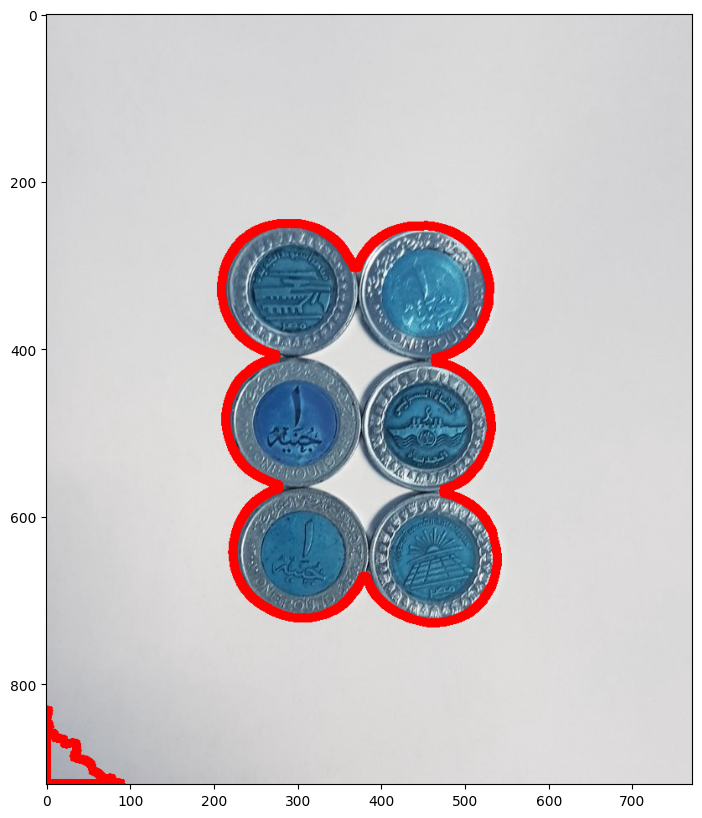

In [12]:
display(sep_coins)

In [13]:
#######################################################################################################################

In [14]:
img = cv2.imread("D:/4Pennies.jpg")

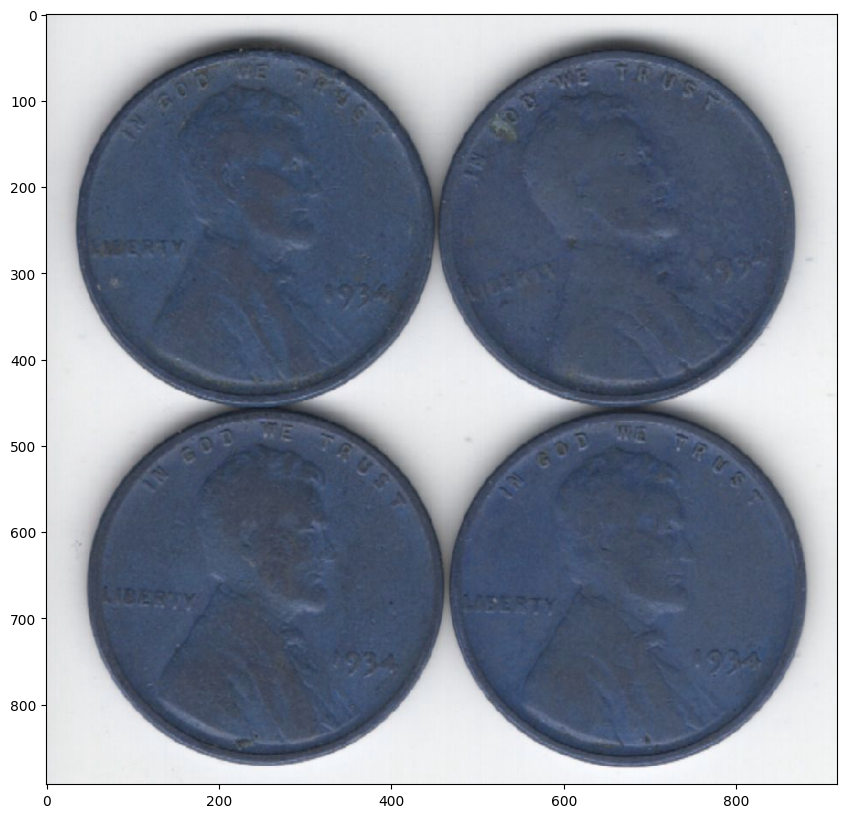

In [15]:
display(img)

In [16]:
img= cv2.medianBlur(img,5)

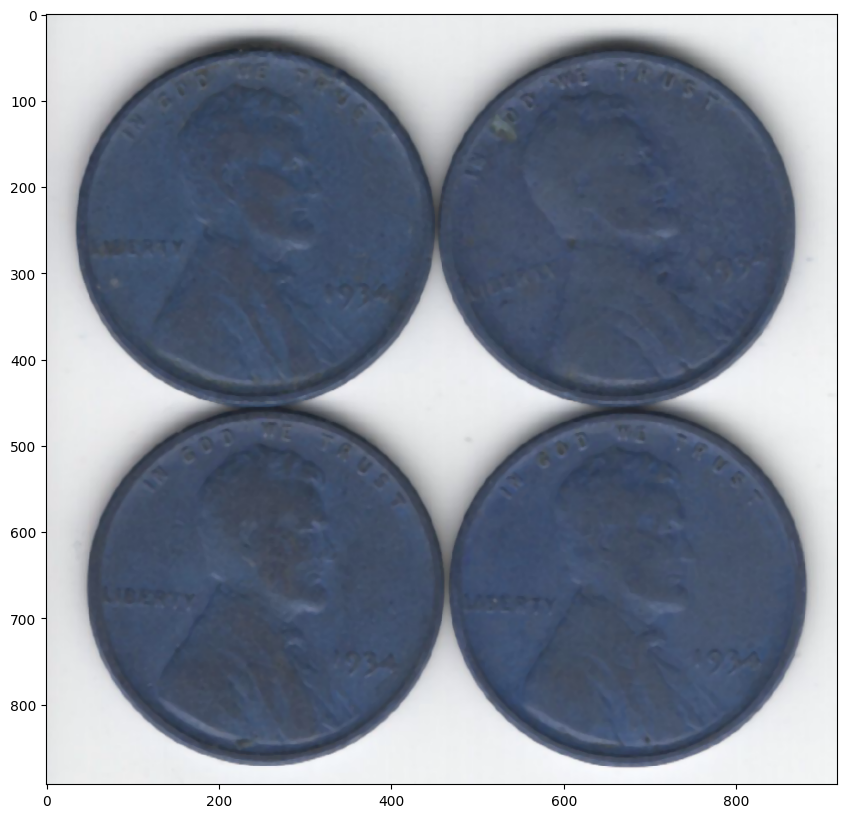

In [17]:
display(img)

In [18]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [19]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

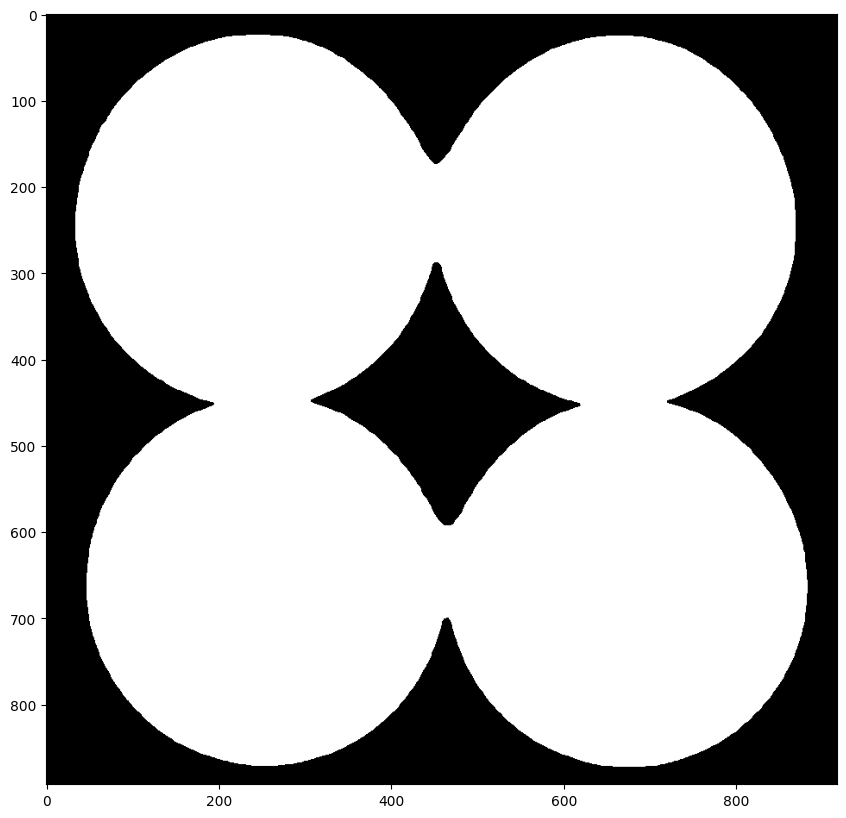

In [20]:
display(thresh)

In [ ]:
##################################################################################################################

Noise Removal (Opsional)

In [21]:
kernel = np.ones((3,3),np.uint8)

In [22]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [23]:
opening= cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel,iterations=2)

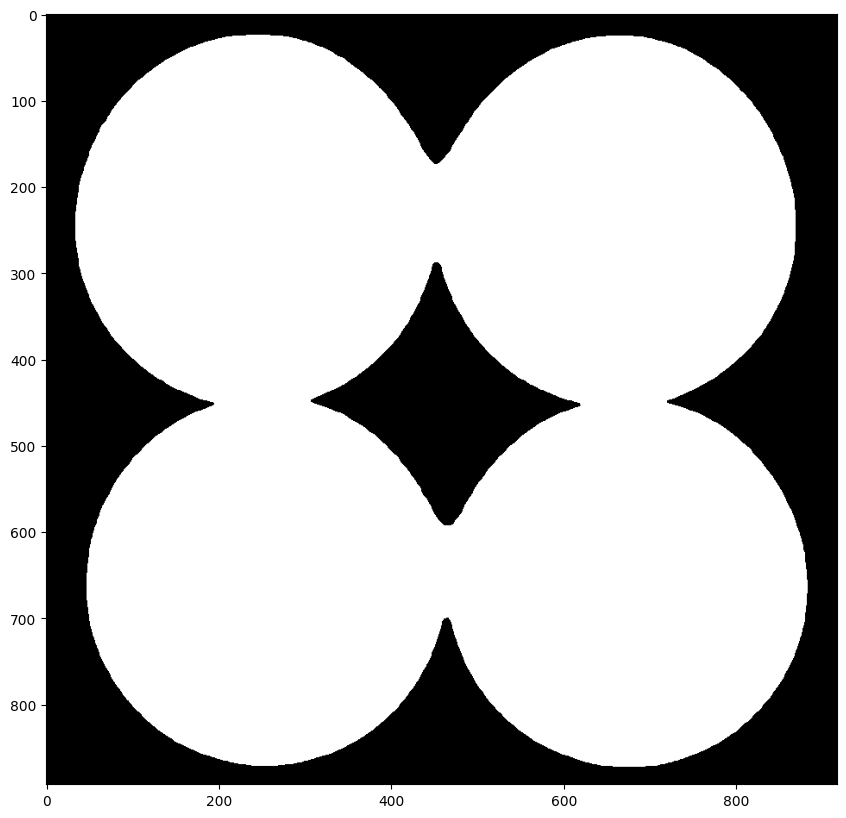

In [24]:
display(opening)

In [25]:
##################################################################################################################

In [ ]:
# To Get Background

In [26]:
sure_bg= cv2.dilate(opening,kernel,iterations=3)

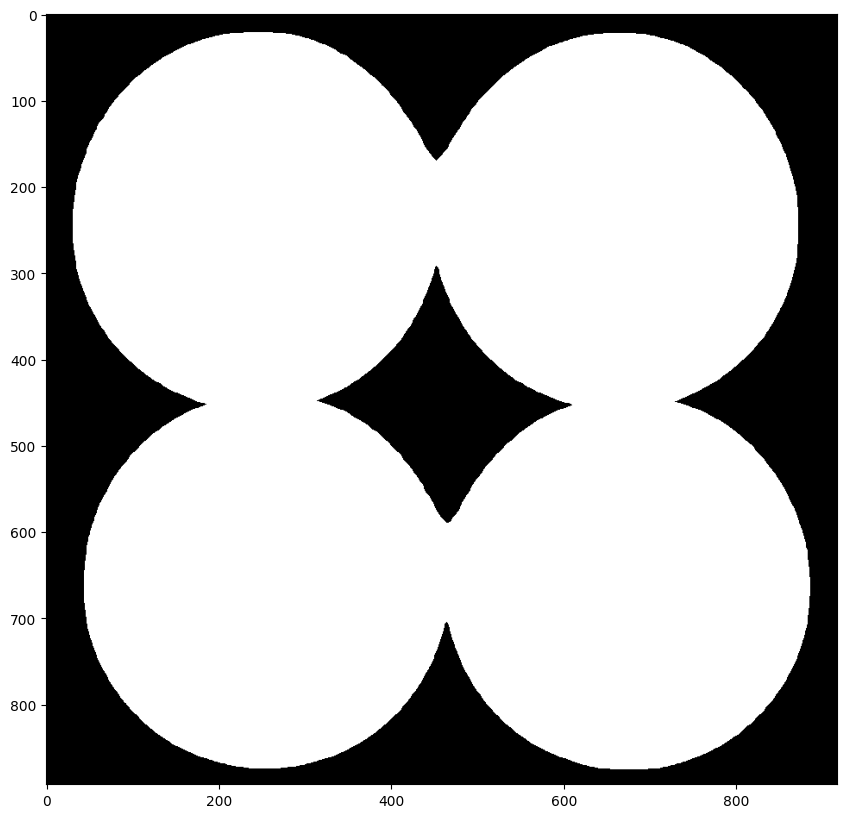

In [27]:
display(sure_bg)

In [ ]:
############################################################################################################

In [ ]:
# To Get Foreground 

In [28]:
dist_transform= cv2.distanceTransform(opening,cv2.DIST_L1,3)

Calculates the distance to the closest zero pixel for each pixel of the source image.

The function cv::distanceTransform calculates the approximate or precise distance from every binary image pixel to the nearest zero pixel.
For zero image pixels, the distance will obviously be zero.

https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#ga8a0b7fdfcb7a13dde018988ba3a43042

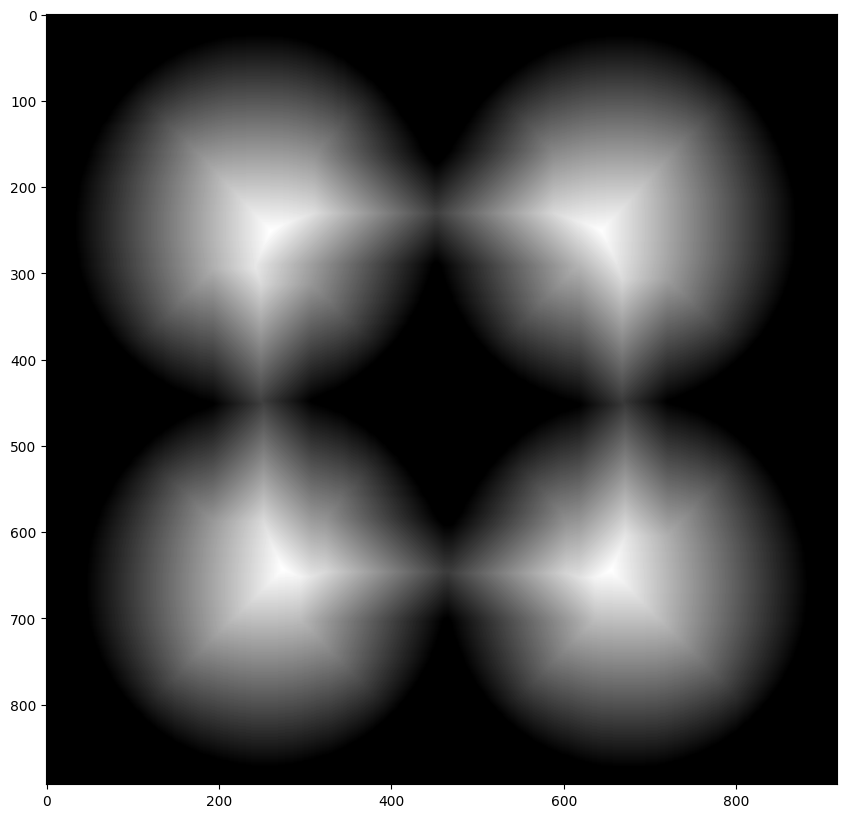

In [29]:
display(dist_transform)

In [30]:
ref , sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(),255,0)

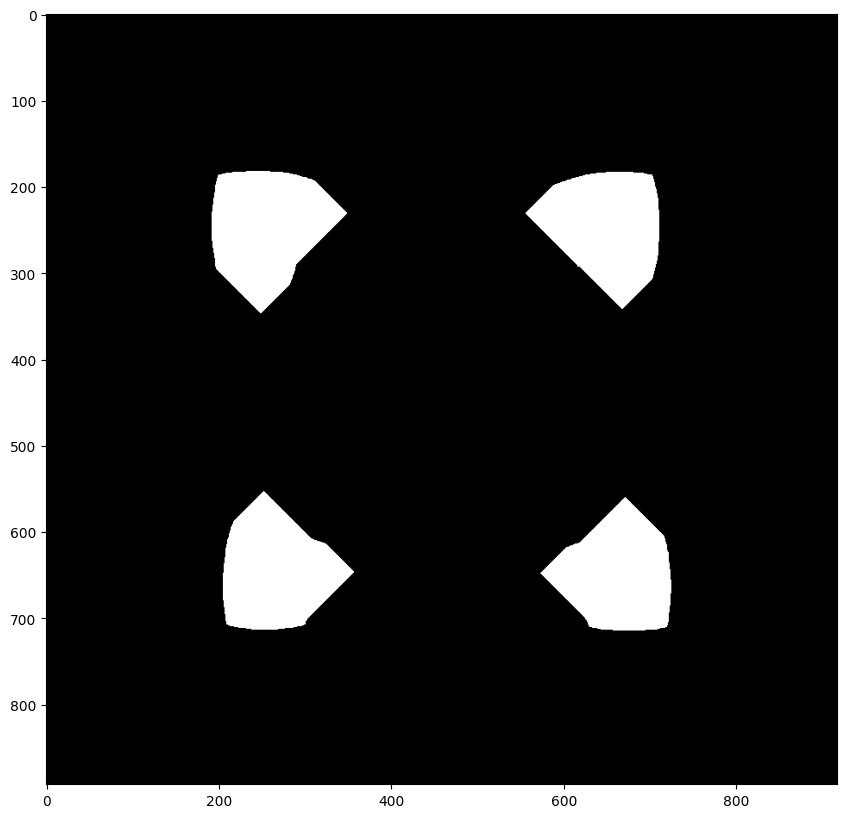

In [31]:
display(sure_fg)

In [32]:
sure_fg= np.uint8(sure_fg)

In [33]:
unknown_region = cv2.subtract(sure_bg,sure_fg) 

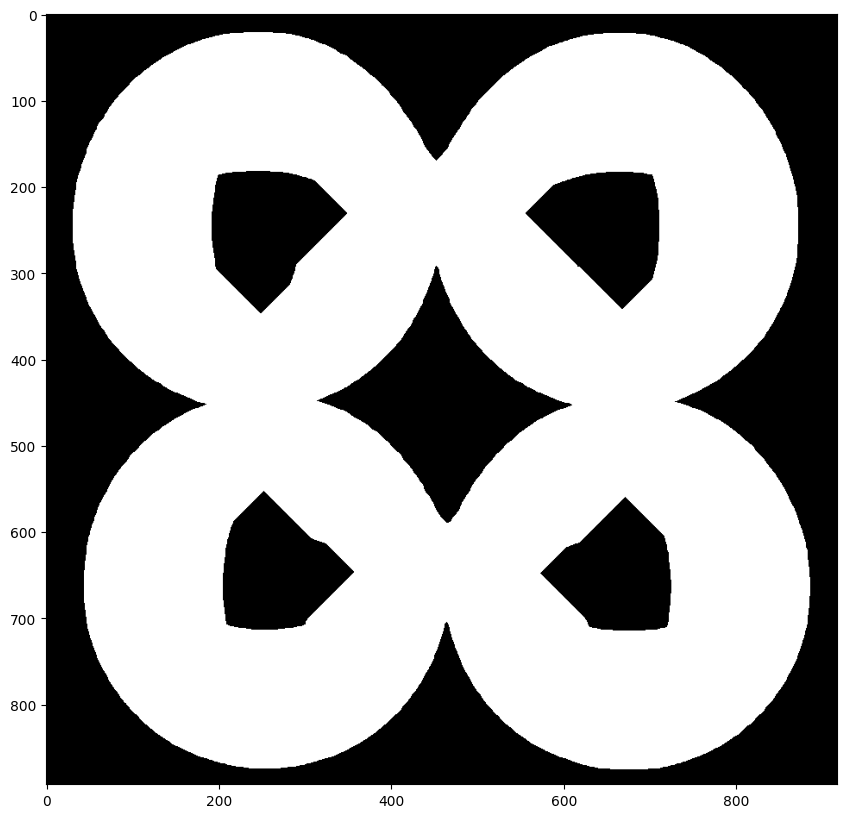

In [34]:
display(unknown_region)

In [35]:
ret , markers = cv2.connectedComponents(sure_fg)

Connected component labeling is the process of assigning a label to each non-zero pixel connected in a binary image.

In [49]:
ret   #retval	Number of labels --> four coins + border

5

In [36]:
markers #labels	Labeling Results

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

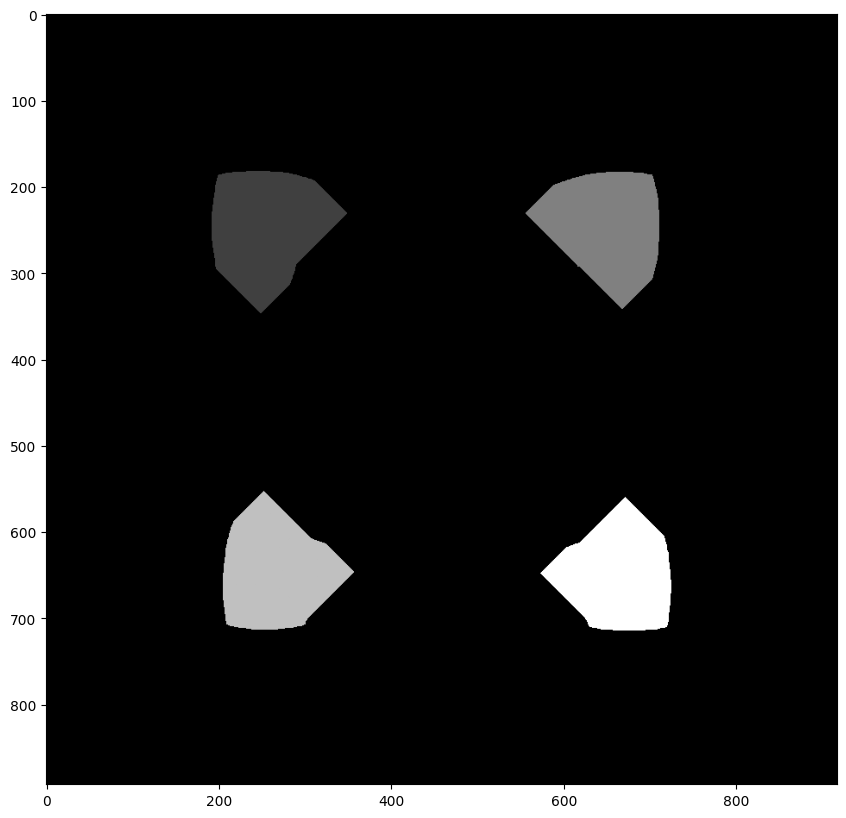

In [37]:
display(markers)

In [38]:
markers = markers + 1

In [39]:
markers

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

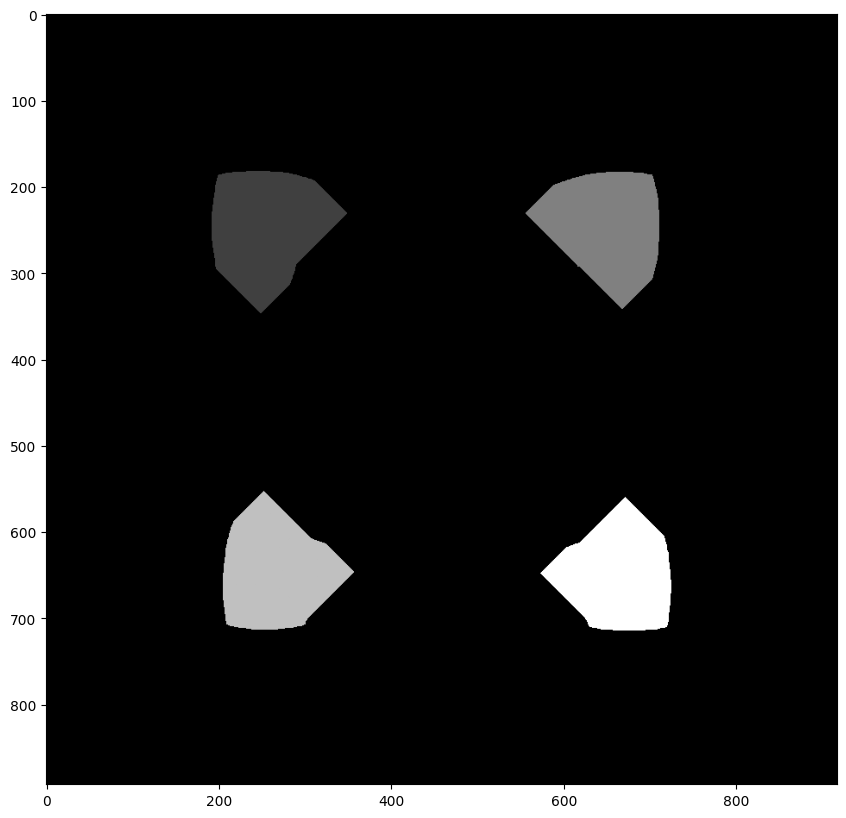

In [40]:
display(markers)

In [41]:
markers[unknown_region==255] = 0

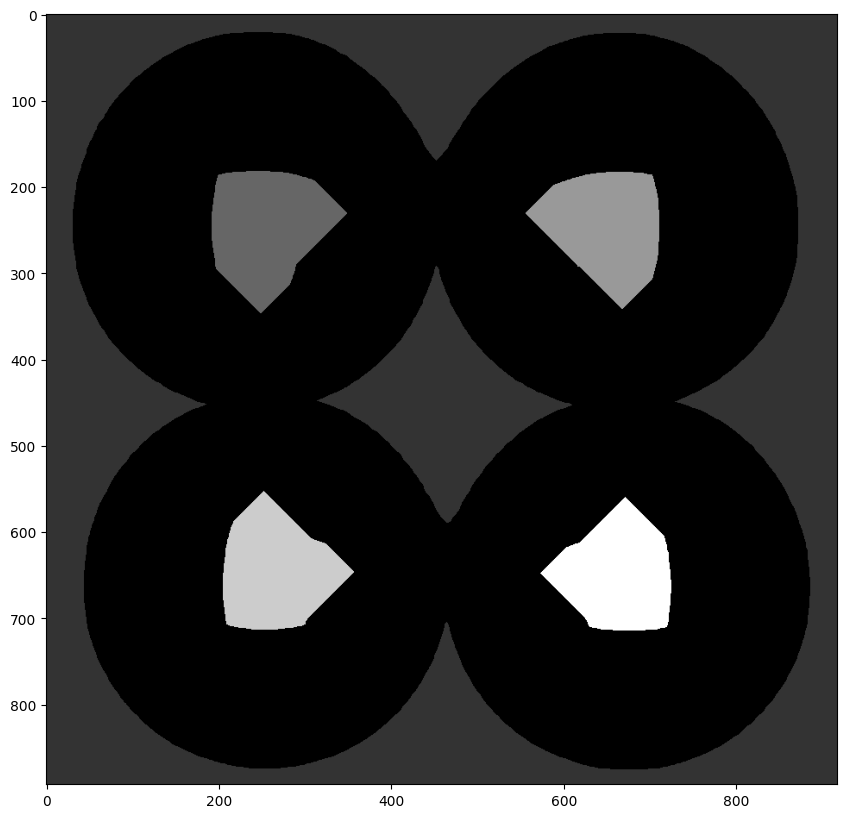

In [42]:
display(markers)

In [43]:
markers= cv2.watershed(img,markers)

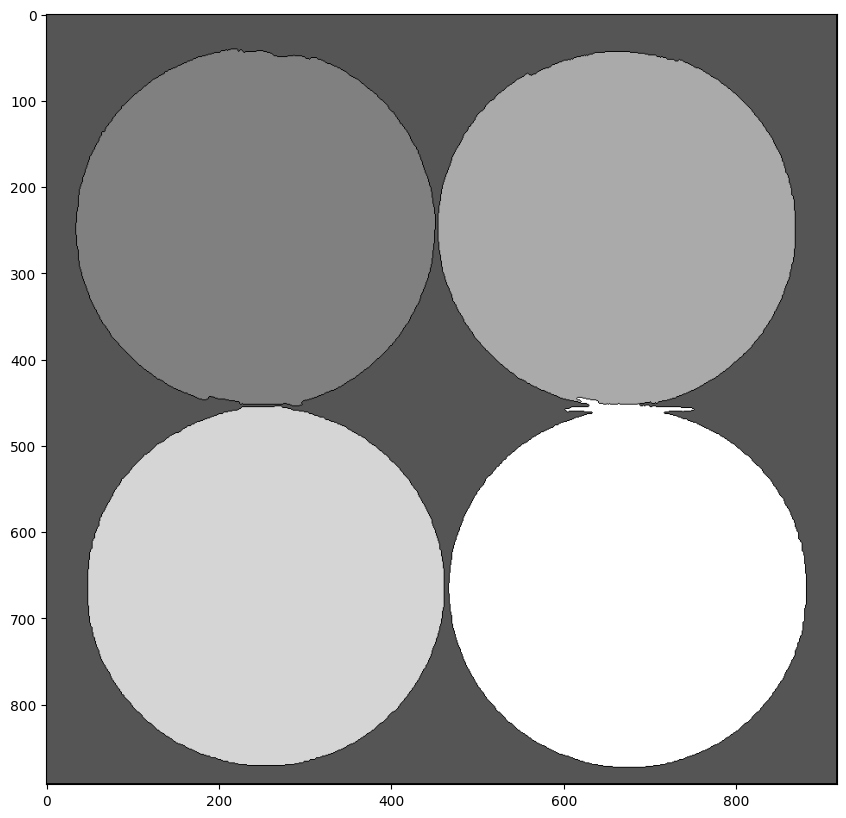

In [44]:
display(markers)

In [45]:
contours , hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [46]:
for i in range (len(contours)):
    
    if hierarchy[0][i][3]== -1:    # checking the last column in hierarchy --> == -1 for External Contour
       
        cv2.drawContours(img, contours,i,(255,0,0),10)

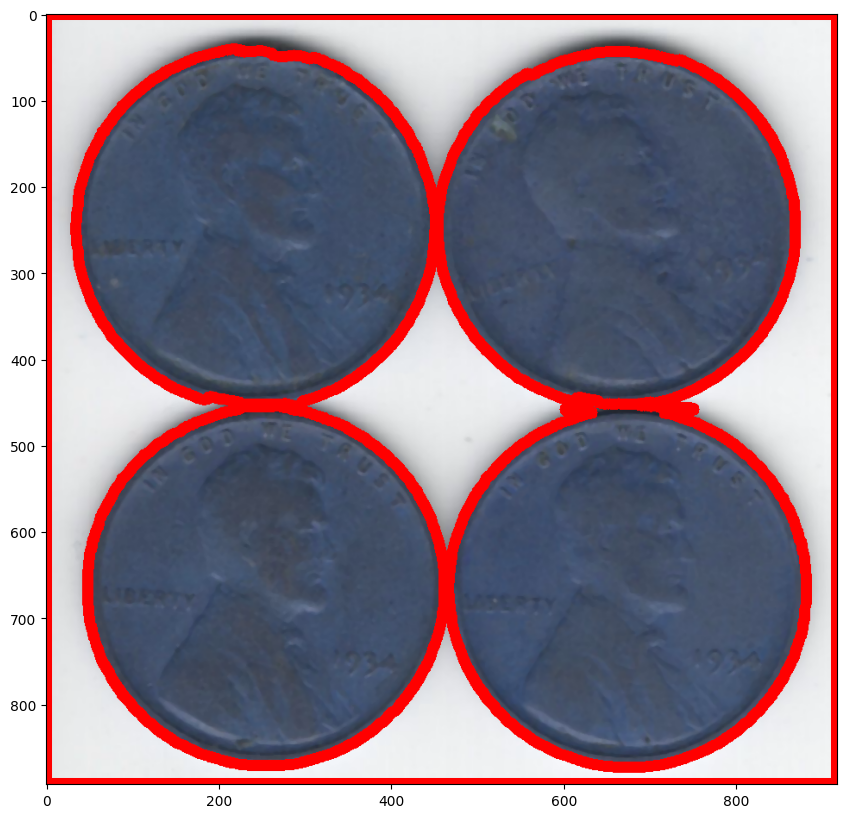

In [47]:
display(img)

In [48]:
######################################################################################################################

When using contour analysis, we are often restricted by the hierarchy of the outlines (i.e., one contour contained within another). With connected component analysis, we can more easily segment and analyze these structures.

https://pyimagesearch.com/2021/02/22/opencv-connected-component-labeling-and-analysis/

# Resources

https://www.youtube.com/watch?v=WQpXS9gBEu8

https://theailearner.com/tag/cv2-watershed/

https://people.cmm.minesparis.psl.eu/users/beucher/wtshed.html#mark

https://en.wikipedia.org/wiki/Watershed_(image_processing)

https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html